<a href="https://colab.research.google.com/github/Joniald/JavaScript/blob/main/01_Newral_networks_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt

2.6.0
1.19.5


# Our data

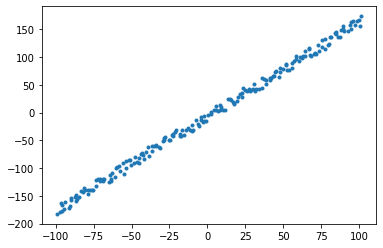

In [2]:
a, b = 1.7, -14.3
arr1 = np.arange(-100,101,1)
arr2 = a*np.arange(-100,101,1) + b
np.random.seed(42)
arr3 = 2*np.random.rand(201)
arr4 = 20*np.random.rand(201)

arr_x = arr1 + arr3
arr_y = arr2 + arr4
plt.scatter(arr_x,arr_y, marker=".")
plt.show()

In [3]:
X = tf.constant(arr_x)
Y = tf.constant(arr_y)
X.shape, Y.shape

(TensorShape([201]), TensorShape([201]))

# Our model

In [4]:
# The model
model = tf.keras.Sequential([
            tf.keras.layers.Dense(1)                 
])

# Compile
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = tf.keras.metrics.mae
)

# Fit
model.fit(X, Y, epochs=5)

Epoch 1/5
7/7 [==============================] - 1s 2ms/step - loss: 72.3658 - mean_absolute_error: 72.3658
Epoch 2/5
7/7 [==============================] - 0s 2ms/step - loss: 11.3695 - mean_absolute_error: 11.3695
Epoch 3/5
7/7 [==============================] - 0s 2ms/step - loss: 10.9881 - mean_absolute_error: 10.9881
Epoch 4/5
7/7 [==============================] - 0s 2ms/step - loss: 12.0145 - mean_absolute_error: 12.0145
Epoch 5/5
7/7 [==============================] - 0s 2ms/step - loss: 11.6388 - mean_absolute_error: 11.6388


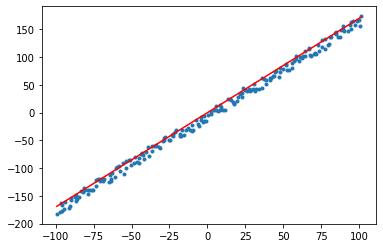

In [5]:
Y_predict = model.predict(X)
Y_predict = tf.squeeze(Y_predict, axis=-1)
plt.scatter(X, Y, marker=".")
plt.plot(X, Y_predict, "r")
plt.show()
print()

In [6]:
print(model.layers[0].weights[0].numpy())
print(model.layers[0].weights[1].numpy())

[[1.7018182]]
[-0.10020832]


# Improving the model

In [7]:
model = tf.keras.Sequential([
                    tf.keras.layers.Dense(50,activation='relu'),
                    tf.keras.layers.Dense(50,activation='relu'),
                    tf.keras.layers.Dense(1)         
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = tf.keras.metrics.mae)

model.fit(X,Y, epochs=25)

Epoch 1/25
7/7 [==============================] - 0s 2ms/step - loss: 78.4542 - mean_absolute_error: 78.4542
Epoch 2/25
7/7 [==============================] - 0s 2ms/step - loss: 72.6713 - mean_absolute_error: 72.6713
Epoch 3/25
7/7 [==============================] - 0s 2ms/step - loss: 66.8492 - mean_absolute_error: 66.8492
Epoch 4/25
7/7 [==============================] - 0s 2ms/step - loss: 61.4263 - mean_absolute_error: 61.4263
Epoch 5/25
7/7 [==============================] - 0s 2ms/step - loss: 55.5831 - mean_absolute_error: 55.5831
Epoch 6/25
7/7 [==============================] - 0s 2ms/step - loss: 49.3661 - mean_absolute_error: 49.3661
Epoch 7/25
7/7 [==============================] - 0s 2ms/step - loss: 42.0633 - mean_absolute_error: 42.0633
Epoch 8/25
7/7 [==============================] - 0s 2ms/step - loss: 33.8283 - mean_absolute_error: 33.8283
Epoch 9/25
7/7 [==============================] - 0s 3ms/step - loss: 26.2643 - mean_absolute_error: 26.2643
Epoch 10/25
7/7 [==

# Evaluating the model

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(arr_x, arr_y, test_size=0.2, random_state=42)

In [9]:
X_train = tf.constant(X_train)
Y_train = tf.constant(Y_train)
X_test = tf.constant(X_test)
Y_test = tf.constant(Y_test)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(160,) (160,) (41,) (41,)


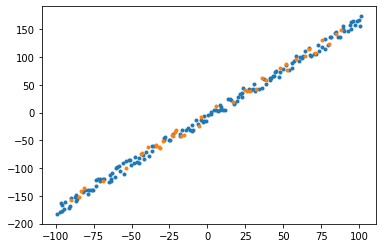

In [10]:
plt.scatter(X_train, Y_train, marker=".")
plt.scatter(X_test, Y_test, marker=".")
plt.show()

In [11]:
model = tf.keras.Sequential([
                    tf.keras.layers.Dense(50,activation='relu'),
                    tf.keras.layers.Dense(50,activation='relu'),
                    tf.keras.layers.Dense(50, activation='relu'),
                    tf.keras.layers.Dense(1)         
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = tf.keras.metrics.mae)

model.fit(X_train, Y_train, epochs=75, verbose=False)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (32, 50)                  100       
_________________________________________________________________
dense_5 (Dense)              (32, 50)                  2550      
_________________________________________________________________
dense_6 (Dense)              (32, 50)                  2550      
_________________________________________________________________
dense_7 (Dense)              (32, 1)                   51        
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________


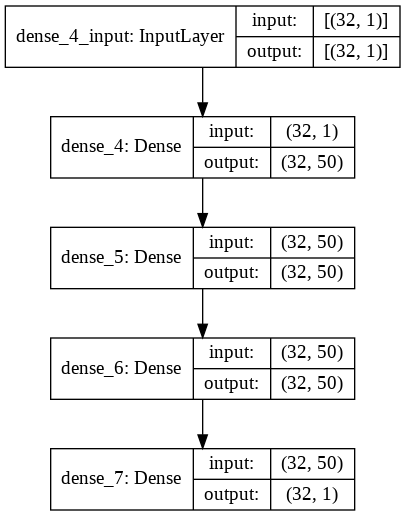

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

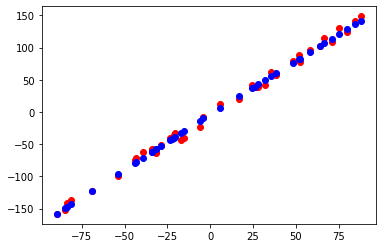

In [14]:
%matplotlib inline
Y_test_predict = model.predict(X_test) # SOS...The shape is now (41,1) and not 41
Y_test_predict = tf.squeeze(Y_test_predict, axis=-1)
plt.scatter(X_test, Y_test, c='r', label="Testing data")
plt.scatter(X_test, Y_test_predict, c="b", label="Predicting data")
plt.show()

In [15]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 5ms/step - loss: 4.8256 - mean_absolute_error: 4.8256


[4.825586795806885, 4.825586795806885]

In [16]:
model_00_mse = tf.metrics.mean_squared_error(Y_test, Y_test_predict)
model_00_mae = tf.metrics.mean_absolute_error(Y_test, Y_test_predict)

## Another model

In [17]:
model01 = tf.keras.Sequential([
                    tf.keras.layers.Dense(200,activation='relu'),
                    tf.keras.layers.Dense(100,activation='relu'),
                    tf.keras.layers.Dense(50,activation='relu'),
                    tf.keras.layers.Dense(1)                        
])

model01.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = tf.keras.metrics.mae
)

model01.fit(X_train, Y_train, epochs=50)

Epoch 1/50
5/5 [==============================] - 0s 5ms/step - loss: 84.0189 - mean_absolute_error: 84.0189
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 72.5388 - mean_absolute_error: 72.5388
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 60.3598 - mean_absolute_error: 60.3598
Epoch 4/50
5/5 [==============================] - 0s 4ms/step - loss: 45.5179 - mean_absolute_error: 45.5179
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 25.5518 - mean_absolute_error: 25.5518
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 13.8276 - mean_absolute_error: 13.8276
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 10.0400 - mean_absolute_error: 10.0400
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 8.7678 - mean_absolute_error: 8.7678
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 7.0661 - mean_absolute_error: 7.0661
Epoch 10/50
5/5 [======

In [18]:
def compareGraphs(X_test, Y_test, model):
  Y_test_predict = model.predict(X_test)
  Y_test_predict = tf.squeeze(Y_test_predict, axis=-1)
  plt.scatter(X_test, Y_test, marker='.')
  plt.scatter(X_test, Y_test_predict, marker='.')
  plt.show()

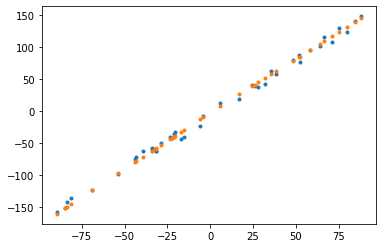

In [19]:
compareGraphs(X_test, Y_test, model01)

In [20]:
me_01 = model01.evaluate(X_test, Y_test, return_dict=False)
arr = np.array(me_01)
arr[0]

2/2 [==============================] - 0s 5ms/step - loss: 4.9200 - mean_absolute_error: 4.9200


4.919964790344238

In [21]:
Y_test_predict = model01.predict(X_test)
Y_test_predict = tf.squeeze(Y_test_predict, axis=-1)
model_01_mse = tf.metrics.mean_squared_error(Y_test, Y_test_predict)
model_01_mae = tf.metrics.mean_absolute_error(Y_test, Y_test_predict)

In [22]:
print(model_00_mse.numpy(), model_01_mse.numpy())
print(model_00_mae.numpy(), model_01_mae.numpy(), me_01[0])

31.142412 33.5263
4.8255877 4.9199634 4.919964790344238


## Saving and Loading the model

In [23]:
model.save("SavedModels/regression")

INFO:tensorflow:Assets written to: SavedModels/regression/assets


In [24]:
newModel = tf.keras.models.load_model("SavedModels/regression")

In [25]:
newModel.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 4.8256 - mean_absolute_error: 4.8256


[4.825586795806885, 4.825586795806885]

In [26]:
from google.colab import files
files.download("SavedModels/regression")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>